# Создание датасета паронимов

Будем строить датасет на основе русского [онлайн-словаря паронимов](https://ru-paronym.ru). 

На выходе мы хотим получить файл, выглядищий следующим образом:



```
{
  'paronym1': {'paronym2': <link>},
  'paronym2': {'paronym1': <link>},
  'paronym3': {'paronym4': <link>},
  ...
}
```
Т.е. для каждого паронима в соответствие ставится его пароним и ссылка на их общую страницу.


In [ ]:
import requests
import json
from bs4 import BeautifulSoup


Для того, чтобы обойти все буквенные страницы в словаре, делаем массив русского алфавита. Заметим, что не для всех букв страницы в словаре есть, так что во избежание лишних ошибок будем пропускать их.

In [ ]:
paronyms = {}
home_url = 'https://ru-paronym.ru'
ru_alphabet = [chr(i) for i in range (ord('А'), ord('А') + 32)]
ru_alphabet

['А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'Й',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Ф',
 'Х',
 'Ц',
 'Ч',
 'Ш',
 'Щ',
 'Ъ',
 'Ы',
 'Ь',
 'Э',
 'Ю',
 'Я']

In [ ]:
no_words = ['Ё', 'Й', 'Щ', 'Ъ', 'Ы', 'Ь']

In [ ]:
for letter in ru_alphabet:
    if letter in no_words:
        continue
    url = home_url + '/' + letter
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    arr = soup.find_all('a', href=True)[2:-27]  # Откидываем первые 2 и последние 27 элемента, которые есть на каждой странице
    for elem in arr:
        webpage = home_url + elem['href']
        words = (elem.string).split(' — ')
        if words[0] not in paronyms.keys():
            paronyms[words[0]] = {}
        if words[1] not in paronyms.keys():
            paronyms[words[1]] = {}
        paronyms[words[0]][words[1]] = webpage
        paronyms[words[1]][words[0]] = webpage

In [ ]:
paronyms

{'абонемент': {'абонент': 'https://ru-paronym.ru/абонемент-абонент'},
 'абонент': {'абонемент': 'https://ru-paronym.ru/абонемент-абонент'},
 'абстрактность': {'абстракция': 'https://ru-paronym.ru/абстрактность-абстракция'},
 'абстракция': {'абстрактность': 'https://ru-paronym.ru/абстрактность-абстракция'},
 'авантюрин': {'авантюрист': 'https://ru-paronym.ru/авантюрин-авантюрист'},
 'авантюрист': {'авантюрин': 'https://ru-paronym.ru/авантюрин-авантюрист'},
 'автобиографический': {'автобиографичный': 'https://ru-paronym.ru/автобиографический-автобиографичный'},
 'автобиографичный': {'автобиографический': 'https://ru-paronym.ru/автобиографический-автобиографичный'},
 'автоматический': {'автоматичный': 'https://ru-paronym.ru/автоматический-автоматичный'},
 'автоматичный': {'автоматический': 'https://ru-paronym.ru/автоматический-автоматичный'},
 'автономия': {'автономность': 'https://ru-paronym.ru/автономия-автономность'},
 'автономность': {'автономия': 'https://ru-paronym.ru/автономия-авто

In [ ]:
with open("paronyms.json", "w", encoding='utf8') as f:
    json.dump(paronyms, f, ensure_ascii=False)

# Выделение паронимов в предложениях

Используя уже имеющийся датасет предложений, выделим те, в которых используются паронимы.

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=2eb2cb2fd7e7725828de09b014f44e9b73b9a1f7438a9a55a31a25f1c63e8a4e
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [3]:
import jsonlines
import pandas
import pymorphy2
from tqdm import tqdm

ModuleNotFoundError: ignored

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
with jsonlines.open('alisa_selezneva.jsonl') as f:
    sentences = pandas.DataFrame(f)

In [ ]:
def morph_list(words, n):
    final = []
    for w in words:
        p = morph.parse(w)[0]
        if 'NOUN' in parse_word.tag:
            final.append(p.inflect({cases[n]}).word)
    return final

In [ ]:
f = jsonlines.open('paronyms_alisa.jsonl', mode='w')
cases = ['nomn', 'gent', 'datv', 'accs', 'ablt', 'loct']
all = sentences['sentence'].to_list()[:-1]
parlist = list(paronyms.keys())
new_sentences = {}
for j in tqdm(range(len(all))):
    now_sent = {'sentence': all[j], 'using_word_id': 0, 'complex_words': []}
    for word in parlist:
        # parse_word = morph.parse(word)[0]
        # word_cases = []
        # if 'NOUN' in parse_word.tag:
        #     for i in cases:
        #         word_cases.append(parse_word.inflect({i}).word)
        # else:
        #     word_cases = [word]
        # for i in range(len(word_cases)):
        #     if word_cases[i] in all[j].split():
        #         if 'NOUN' in parse_word.tag:
        #             pars = morph_list(list(paronyms[word].keys()), i)
        #         else:
        #             pars = list(paronyms[word].keys())
        #         now_sent['paronyms'].append({'word': word_cases[i], 'paronyms': pars})
        if word in all[j].split():
            now_sent['paronyms'].append({'word': word, 'distortions': list(paronyms[word].keys())})
    if len(now_sent['paronyms']) > 0:
        f.write(now_sent)
f.close()

100%|██████████| 10000/10000 [00:26<00:00, 383.13it/s]


# Расстояние Левенштейна

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.6 MB/s eta 0:00:00


In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sus
import pickle
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
nouns = json.load(open('drive/MyDrive/nouns.json'))

In [ ]:
wout_def = list(nouns.keys())

In [ ]:
sus.set(rc={'figure.figsize':(15,9)})

In [ ]:
with open("drive/MyDrive/leiv.pickle", "rb") as f:
    leiv = np.array(pickle.load(f))
with open("drive/MyDrive/leiv2.pickle", "rb") as f:
    leiv2 = np.array(pickle.load(f))
final_leiv = leiv + leiv2

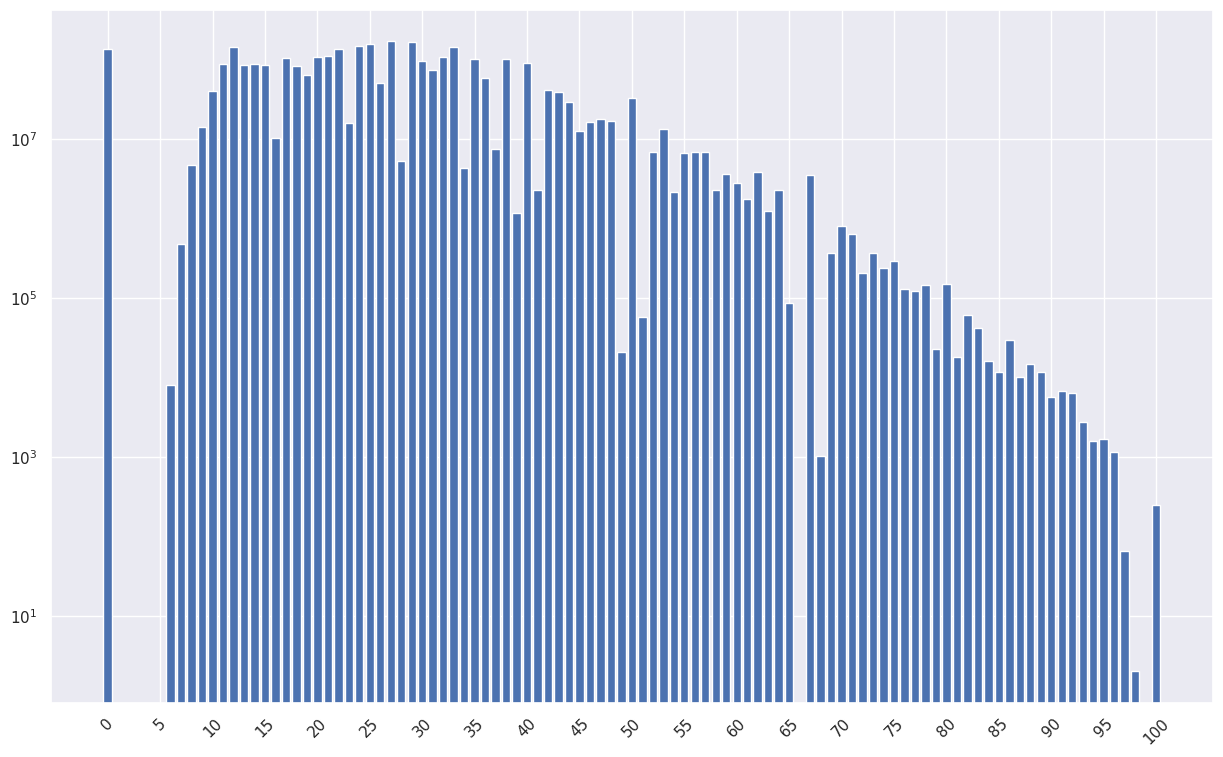

In [ ]:
plt.bar(range(len(final_leiv)), final_leiv, align="center")
plt.yscale('log')
ticks = [i for i in range(0, 101, 5)]
plt.xticks(range(0, len(final_leiv), 5), ticks, rotation=45)
plt.show()

In [ ]:
# leiv = [0 for i in range(101)]
paronyms = {}
for i in range(31449):
    for j in range(len(wout_def)):
        if i == j:
            continue
        x = fuzz.token_sort_ratio(wout_def[i], wout_def[j])
        if x > 85:
            if wout_def[i] not in paronyms.keys():
                paronyms[wout_def[i]] = []
            paronyms[wout_def[i]].append(wout_def[j])
            print(wout_def[i], wout_def[j], x)
        # leiv[x] += 1
    with open("drive/MyDrive/new_paronyms2.json", "w", encoding='utf8') as f:
        json.dump(paronyms, f, ensure_ascii=False)
    # with open("drive/MyDrive/leiv2.pickle", "wb") as f:
    #     pickle.dump(leiv, f)
# plt.bar(range(len(leiv)), leiv, align="center")
# ticks = [i for i in range(0, 101, 5)]
# plt.xticks(range(0, len(leiv), 5), ticks, rotation=45)
# plt.show()


Streaming output truncated to the last 5000 lines.
папироса папироска 94
папироска папироса 94
папироска папиросочка 90
папиросник папиросница 86
папиросница папиросник 86
папиросница папиросочница 92
папиросочка папироска 90
папиросочница папиросница 92
папка папа 89
папоротка папороток 89
папоротник папоротники 95
папоротники папоротник 95
папоротниковидные папоротниковые 90
папоротниковые папоротниковидные 90
папороток папоротка 89
папочка лапочка 86
папочка палочка 86
папочка парочка 86
папочка пупочка 86
папочка тапочка 86
папочка шапочка 86
папошник папушник 88
паприка парилка 86
папство панство 86
папуас папуаска 86
папуас папуасы 92
папуаска папуас 86
папуасы пампасы 86
папуасы папуас 92
папуша пампуша 92
папуша пампушка 86
папуша папушка 92
папушка лапушка 86
папушка павушка 86
папушка падушка 86
папушка пазушка 86
папушка пампуша 86
папушка пампушка 93
папушка папашка 86
папушка папуша 92
папушка папушовка 88
папушник папошник 88
папушник пушник 86
папушовка папушка 88
пар па

# Word2Vec


In [ ]:
! mkdir sents
! unzip drive/MyDrive/S+V.zip -d sents

mkdir: cannot create directory ‘sents’: File exists
Archive:  drive/MyDrive/S+V.zip
replace sents/S+V.plain.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
with open("sents/S+V.plain.txt", "r", encoding='utf8') as f:
    raw_data = f.readlines()
raw_data

['Потом Аарон встал.\n',
 'Теперь аббат побагровел.\n',
 'Наконец аббат забрался обратно.\n',
 'В конце концов аббат уступил.\n',
 'Потом абонент вернулся.\n',
 'В конце концов Абрамов согласился.\n',
 'Они абсолютно не усваиваются!\n',
 'Я абсолютно понимаю!\n',
 'Я абсолютно обессилела.\n',
 'Я абсолютно не боюсь.\n',
 'Мы абсолютно не отказали.\n',
 'Мужчина абсолютно не пострадал.\n',
 'Они абсолютно совпадают.\n',
 'Михаил абсолютно не рисковал.\n',
 'Я абсолютно не выспалась.\n',
 'Они абсолютно не сочетаются.\n',
 'Я абсолютно не обижусь...\n',
 'Они абсолютно не церемонятся!\n',
 'Я абсолютно не почувствовала.\n',
 'Я абсолютно не преувеличиваю.\n',
 'Я абсолютно не утрирую.\n',
 'Они абсолютно не мешают.\n',
 'Они абсолютно не работают!\n',
 'Я абсолютно не пью.\n',
 'Я абсолютно не напился.\n',
 'Мы абстрагировались.\n',
 'Больше аварец не появлялся.\n',
 'Поначалу Авдей не поверил.\n',
 'Наконец Авенир кончил.\n',
 'Утром Аверьян едва поднялся.\n',
 'Здесь Аверьянов преуспел

In [ ]:
import pandas as pd
df = pd.DataFrame(raw_data, columns=['sentences'])
df

,sentences
0,Потом Аарон встал.\n
1,Теперь аббат побагровел.\n
2,Наконец аббат забрался обратно.\n
3,В конце концов аббат уступил.\n
4,Потом абонент вернулся.\n
...,...
361770,Тут Яшка понял.\n
361771,Зря ящер упал.\n
361772,Неожиданно ящер взревел.\n
361773,Наконец-то ящерица пошевелилась.\n


In [44]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    if text == "":
        text = "empty"
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['sentences'] = df['sentences'].apply(process_text)
df

,sentences
0,"[потом, аарон, встал]"
1,"[теперь, аббат, побагровел]"
2,"[наконец, аббат, забрался, обратно]"
3,"[в, конце, концов, аббат, уступил]"
4,"[потом, абонент, вернулся]"
...,...
361770,"[тут, яшка, понял]"
361771,"[зря, ящер, упал]"
361772,"[неожиданно, ящер, взревел]"
361773,"[наконец-то, ящерица, пошевелилась]"


In [4]:
import json
with open("drive/MyDrive/new_paronyms.json", "r", encoding='utf8') as f:
    paronyms = json.load(f)
with open("drive/MyDrive/new_paronyms2.json", "r", encoding='utf8') as f:
    paronyms2 = json.load(f)
all_paronyms = paronyms2 | paronyms

In [5]:
len(all_paronyms), len(paronyms), len(paronyms2)

(34491, 15204, 19287)

In [6]:
from gensim.models import Word2Vec
import math

In [8]:
data = [[elem] for elem in list(all_paronyms.keys())]

In [9]:
model = Word2Vec(
    min_count=1,
    window=1,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [ ]:
model.build_vocab(df['sentences'])

In [ ]:
model.train(df['sentences'], total_examples=model.corpus_count, epochs=30, report_delay=1)

(17660113, 30247500)

In [ ]:
model.init_sims(replace=True)

<ipython-input-44-dabd6e7393f0>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [11]:
from scipy.spatial import distance

In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.4 MB/s eta 0:00:00


In [12]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model, tokenizer).shape)
# (312,)


Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(312,)


In [24]:
all_paronyms

{'абаз': ['абхаз', 'баз', 'лабаз'],
 'абазин': ['абазинец', 'абазинка', 'абазинцы', 'абазины'],
 'абазинец': ['абазин', 'абазинцы'],
 'абазинка': ['абазин'],
 'абазинцы': ['абазин', 'абазинец', 'абазины'],
 'абазины': ['абазин', 'абазинцы'],
 'абак': ['абака', 'бак', 'кабак', 'табак'],
 'абака': ['абак', 'табака'],
 'аббатиса': ['аббатисса'],
 'аббатисса': ['аббатиса'],
 'абиссинец': ['абиссинцы'],
 'абиссинцы': ['абиссинец'],
 'абитуриент': ['абитуриентка'],
 'абитуриентка': ['абитуриент'],
 'аболиционист': ['аболиционистка'],
 'аболиционистка': ['аболиционист'],
 'абонемент': ['абонент'],
 'абонент': ['абонемент'],
 'абориген': ['аборигенка', 'аборигены'],
 'аборигенка': ['абориген'],
 'аборигены': ['абориген'],
 'аборт': ['борт'],
 'абразив': ['абразия'],
 'абразия': ['абразив'],
 'абрикос': ['абрикосик'],
 'абрикосик': ['абрикос'],
 'абсолютист': ['абсолютистка'],
 'абсолютистка': ['абсолютист'],
 'абсорбент': ['адсорбент'],
 'абсорбция': ['адсорбция'],
 'абстрагирование': ['застра

In [33]:
new_paronyms = {}
dists = []
for elem in all_paronyms.keys():
    try:
        main_word = embed_bert_cls(elem, model, tokenizer)
    except:
        continue
    final_words = {}
    for sec_elem in all_paronyms[elem]:
        # print(elem, sec_elem, dist)
        try:
            this_word = embed_bert_cls(sec_elem, model, tokenizer)
        except:
            continue
        dist = math.dist(main_word, this_word)
        final_words[sec_elem] = dist
        dists.append(dist)
    if len(final_words) > 0:
        new_paronyms[elem] = final_words
print(min(dists), max(dists))


0.05278308640340048 0.7747155194327726


In [34]:
new_paronyms

{'абаз': {'абхаз': 0.3554289795891278,
  'баз': 0.44304952795702957,
  'лабаз': 0.33907782030163974},
 'абазин': {'абазинец': 0.23981486858361808,
  'абазинка': 0.2288216147049138,
  'абазинцы': 0.3665699782955781,
  'абазины': 0.24608557056748168},
 'абазинец': {'абазин': 0.23981486858361808, 'абазинцы': 0.3343372461881886},
 'абазинка': {'абазин': 0.2288216147049138},
 'абазинцы': {'абазин': 0.3665699782955781,
  'абазинец': 0.3343372461881886,
  'абазины': 0.3021199195223106},
 'абазины': {'абазин': 0.24608557056748168, 'абазинцы': 0.3021199195223106},
 'абак': {'абака': 0.118178101496048,
  'бак': 0.35312288930904806,
  'кабак': 0.28575301667225367,
  'табак': 0.47602936050494077},
 'абака': {'абак': 0.118178101496048, 'табака': 0.4811424803825},
 'аббатиса': {'аббатисса': 0.1955196192644348},
 'аббатисса': {'аббатиса': 0.1955196192644348},
 'абиссинец': {'абиссинцы': 0.24115516345739058},
 'абиссинцы': {'абиссинец': 0.24115516345739058},
 'абитуриент': {'абитуриентка': 0.189114488

In [35]:
dr = new_paronyms.keys()
for keyw in list(dr):
    if keyw not in new_paronyms.keys():
        continue
    if len(keyw) < 4:
        print(keyw, new_paronyms[keyw])
        for val in new_paronyms[keyw]:
            new_paronyms[val].pop(keyw)
            if len(new_paronyms[val]) == 0:
                new_paronyms.pop(val)
        new_paronyms.pop(keyw)

ага {'агар': 0.36010297917596246, 'агат': 0.27484197926857434, 'вага': 0.3847273760225207, 'гага': 0.39276866688675444, 'сага': 0.4200859285576503, 'чага': 0.3827366606559929}
агу {'агул': 0.23104019083054017, 'рагу': 0.23599350538092906}
азу {'азур': 0.2108735363780595}
азы {'газы': 0.535675448458418, 'лазы': 0.3330101189234462, 'тазы': 0.30645737056172634}
акт {'акты': 0.23509866326245965, 'пакт': 0.43780359596583257, 'такт': 0.3654168647170304, 'факт': 0.39202804212488146}
ант {'анты': 0.20613805572437596, 'бант': 0.2849323945656812, 'кант': 0.34666803222927944, 'мант': 0.3729314928836242, 'рант': 0.3646437983216642, 'фант': 0.36303761777935933}
арк {'арак': 0.2403223112118264, 'арка': 0.1294880470477426, 'арык': 0.16056198406201014, 'барк': 0.3205407533895508, 'парк': 0.6516001245647137}
аул {'агул': 0.1673027470538588, 'баул': 0.24131020721194976, 'паул': 0.2384315066810922}
аут {'паут': 0.31470934560816016, 'раут': 0.31860005441067435, 'фаут': 0.531682210409191}
баз {'абаз': 0.44

In [36]:
new_paronyms

{'абаз': {'абхаз': 0.3554289795891278, 'лабаз': 0.33907782030163974},
 'абазин': {'абазинец': 0.23981486858361808,
  'абазинка': 0.2288216147049138,
  'абазинцы': 0.3665699782955781,
  'абазины': 0.24608557056748168},
 'абазинец': {'абазин': 0.23981486858361808, 'абазинцы': 0.3343372461881886},
 'абазинка': {'абазин': 0.2288216147049138},
 'абазинцы': {'абазин': 0.3665699782955781,
  'абазинец': 0.3343372461881886,
  'абазины': 0.3021199195223106},
 'абазины': {'абазин': 0.24608557056748168, 'абазинцы': 0.3021199195223106},
 'абак': {'абака': 0.118178101496048,
  'кабак': 0.28575301667225367,
  'табак': 0.47602936050494077},
 'абака': {'абак': 0.118178101496048, 'табака': 0.4811424803825},
 'аббатиса': {'аббатисса': 0.1955196192644348},
 'аббатисса': {'аббатиса': 0.1955196192644348},
 'абиссинец': {'абиссинцы': 0.24115516345739058},
 'абиссинцы': {'абиссинец': 0.24115516345739058},
 'абитуриент': {'абитуриентка': 0.18911448832031436},
 'абитуриентка': {'абитуриент': 0.18911448832031436

In [48]:
final = {}
for keyw in new_paronyms.keys():
    av = 0
    for val in new_paronyms[keyw]:
        av += new_paronyms[keyw][val]
    av /= len(new_paronyms[keyw])
    av /= max(dists)
    final[keyw] = {'dif':av, 'distortions':list(new_paronyms[keyw].keys())}

In [49]:
final

{'абаз': {'dif': 0.4482334369648797, 'distortions': ['абхаз', 'лабаз']},
 'абазин': {'dif': 0.34893196438845275,
  'distortions': ['абазинец', 'абазинка', 'абазинцы', 'абазины']},
 'абазинец': {'dif': 0.3705567401000219,
  'distortions': ['абазин', 'абазинцы']},
 'абазинка': {'dif': 0.2953621154671734, 'distortions': ['абазин']},
 'абазинцы': {'dif': 0.43156794068118864,
  'distortions': ['абазин', 'абазинец', 'абазины']},
 'абазины': {'dif': 0.353810835292918, 'distortions': ['абазин', 'абазинцы']},
 'абак': {'dif': 0.3786166046763968,
  'distortions': ['абака', 'кабак', 'табак']},
 'абака': {'dif': 0.3868004234104898, 'distortions': ['абак', 'табака']},
 'аббатиса': {'dif': 0.2523760197905799, 'distortions': ['аббатисса']},
 'аббатисса': {'dif': 0.2523760197905799, 'distortions': ['аббатиса']},
 'абиссинец': {'dif': 0.31128221574024795, 'distortions': ['абиссинцы']},
 'абиссинцы': {'dif': 0.31128221574024795, 'distortions': ['абиссинец']},
 'абитуриент': {'dif': 0.2441082998553834, '

In [50]:
with open("drive/MyDrive/allparonyms.json", "w", encoding='utf8') as f:
        json.dump(final, f, ensure_ascii=False)

In [ ]:
! pip install transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00


In [ ]:
dists

[1.3941996546217246,
 1.4597483808012197,
 1.325428817329341,
 1.2807747569592542,
 1.2807747569592542,
 1.4620629120906006,
 1.4620629120906006,
 1.4645065113056406,
 1.4113264100721634,
 1.4609899327496296,
 1.440467230140692,
 1.4645065113056406,
 1.5030854336624633,
 1.4592157975198936,
 1.4592157975198936,
 1.4113264100721634,
 1.4854564121551634,
 1.2486052973374124,
 1.4609899327496296,
 1.5529799238638888,
 1.5680206132261079,
 1.4184754522395453,
 1.5030854336624633,
 1.4854564121551634,
 1.4208608024905969,
 1.4208608024905969,
 1.3780886565376782,
 1.4743500684902695,
 1.4743500684902695,
 1.2486052973374124,
 1.440467230140692,
 1.5529799238638888,
 1.4818964421113918,
 1.4600030496173282,
 1.374312639696301,
 1.435287482528073,
 1.3860289212686276,
 1.4686600541445896,
 1.5915184168713228,
 1.4754520051927762,
 1.5533644520907781,
 1.4715223340033297,
 1.3903027487631017,
 1.3462056993346814,
 1.435287482528073,
 1.4855934732977356,
 1.3853872188771328,
 1.354839825900086,

# Новая генерация предложений


In [38]:
!pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import json
import jsonlines
import pandas
import tqdm

In [40]:
with jsonlines.open('drive/MyDrive/alisa_selezneva.jsonl') as f:
    sentences = pandas.DataFrame(f)

In [51]:
with open("drive/MyDrive/allparonyms.json", "r", encoding='utf8') as f:
    paronyms = json.load(f)

In [52]:
paronyms

{'абаз': {'dif': 0.4482334369648797, 'distortions': ['абхаз', 'лабаз']},
 'абазин': {'dif': 0.34893196438845275,
  'distortions': ['абазинец', 'абазинка', 'абазинцы', 'абазины']},
 'абазинец': {'dif': 0.3705567401000219,
  'distortions': ['абазин', 'абазинцы']},
 'абазинка': {'dif': 0.2953621154671734, 'distortions': ['абазин']},
 'абазинцы': {'dif': 0.43156794068118864,
  'distortions': ['абазин', 'абазинец', 'абазины']},
 'абазины': {'dif': 0.353810835292918, 'distortions': ['абазин', 'абазинцы']},
 'абак': {'dif': 0.3786166046763968,
  'distortions': ['абака', 'кабак', 'табак']},
 'абака': {'dif': 0.3868004234104898, 'distortions': ['абак', 'табака']},
 'аббатиса': {'dif': 0.2523760197905799, 'distortions': ['аббатисса']},
 'аббатисса': {'dif': 0.2523760197905799, 'distortions': ['аббатиса']},
 'абиссинец': {'dif': 0.31128221574024795, 'distortions': ['абиссинцы']},
 'абиссинцы': {'dif': 0.31128221574024795, 'distortions': ['абиссинец']},
 'абитуриент': {'dif': 0.2441082998553834, '

In [56]:
f = jsonlines.open('paronyms_alisa_new.jsonl', mode='w')
all = sentences['sentence'].to_list()[:-1]
parlist = list(paronyms.keys())
new_sentences = {}
for j in tqdm.tqdm(range(len(all))):
    now_sent = {'sentence': all[j], 'using_word_id': 0, 'complex_words': []}
    difs = []
    for word in process_text(all[j]):
        if word in parlist:
            now_sent['complex_words'].append({'word': word, 'dif': paronyms[word]["dif"], 'distortions': paronyms[word]["distortions"]})
            difs.append(paronyms[word]['dif'])
    if len(now_sent['complex_words']) > 0:
        now_sent['using_word_id'] = difs.index(max(difs))
        f.write(now_sent)
f.close()

100%|██████████| 10000/10000 [01:52<00:00, 89.15it/s]


In [ ]:
import json

with open('paronyms.json', 'r', encoding='utf8') as f:
    pars = json.load(f)

In [ ]:
for elem in pars.keys():
    if len(pars[elem]) >= 2:
        print(elem, pars[elem])

невинный {'безвинный': 'https://ru-paronym.ru/безвинный-невинный', 'невиновный': 'https://ru-paronym.ru/невинный-невиновный'}
доверие {'вера': 'https://ru-paronym.ru/вера-доверие', 'доверительность': 'https://ru-paronym.ru/доверие-доверительность'}
одиночный {'единичный': 'https://ru-paronym.ru/единичный-одиночный', 'одинокий': 'https://ru-paronym.ru/одинокий-одиночный'}
озолотить {'обзолотить': 'https://ru-paronym.ru/обзолотить-озолотить', 'озолотеть': 'https://ru-paronym.ru/озолотеть-озолотить'}
человечный {'человеческий': 'https://ru-paronym.ru/человеческий-человечный', 'человечий': 'https://ru-paronym.ru/человечий-человечный'}
юмористка {'юмореска': 'https://ru-paronym.ru/юмореска-юмористка', 'юмористика': 'https://ru-paronym.ru/юмористика-юмористка'}


In [ ]:
pars

{'абонемент': {'абонент': 'https://ru-paronym.ru/абонемент-абонент'},
 'абонент': {'абонемент': 'https://ru-paronym.ru/абонемент-абонент'},
 'абстрактность': {'абстракция': 'https://ru-paronym.ru/абстрактность-абстракция'},
 'абстракция': {'абстрактность': 'https://ru-paronym.ru/абстрактность-абстракция'},
 'авантюрин': {'авантюрист': 'https://ru-paronym.ru/авантюрин-авантюрист'},
 'авантюрист': {'авантюрин': 'https://ru-paronym.ru/авантюрин-авантюрист'},
 'автобиографический': {'автобиографичный': 'https://ru-paronym.ru/автобиографический-автобиографичный'},
 'автобиографичный': {'автобиографический': 'https://ru-paronym.ru/автобиографический-автобиографичный'},
 'автоматический': {'автоматичный': 'https://ru-paronym.ru/автоматический-автоматичный'},
 'автоматичный': {'автоматический': 'https://ru-paronym.ru/автоматический-автоматичный'},
 'автономия': {'автономность': 'https://ru-paronym.ru/автономия-автономность'},
 'автономность': {'автономия': 'https://ru-paronym.ru/автономия-авто